# Investigating the functions


In [11]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process.kernels import Matern
import matplotlib.pyplot as plt

f1_inp = np.load("./../function_7/initial_inputs.npy")
f1_out = np.load("./../function_7/initial_outputs.npy")
f1_out


f1_inp,f1_out


(array([[0.27262382, 0.32449536, 0.89710881, 0.83295115, 0.15406269,
         0.79586362],
        [0.54300258, 0.9246939 , 0.34156746, 0.64648585, 0.71844033,
         0.34313266],
        [0.09083225, 0.66152938, 0.06593091, 0.25857701, 0.96345285,
         0.6402654 ],
        [0.11886697, 0.61505494, 0.90581639, 0.8553003 , 0.41363143,
         0.58523563],
        [0.63021764, 0.8380969 , 0.68001305, 0.73189509, 0.52673671,
         0.34842921],
        [0.76491917, 0.25588292, 0.60908422, 0.21807904, 0.32294277,
         0.09579366],
        [0.05789554, 0.49167222, 0.24742222, 0.21811844, 0.42042833,
         0.73096984],
        [0.19525188, 0.07922665, 0.55458046, 0.17056682, 0.01494418,
         0.10703171],
        [0.64230298, 0.83687455, 0.02179269, 0.10148801, 0.68307083,
         0.6924164 ],
        [0.78994255, 0.19554501, 0.57562333, 0.07365919, 0.25904917,
         0.05109986],
        [0.52849733, 0.45742436, 0.36009569, 0.36204551, 0.81689098,
         0.63747637],

# ******************************** EDA - Analysis **********************************


In [2]:
from scipy.stats import skew 

pd_inp = pd.DataFrame(f1_inp)
pd_out = pd.DataFrame(f1_out, columns=["Output"])


pd_inp.describe()
#pd_out.describe()

,0,1,2,3,4,5
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.510852,0.395803,0.389609,0.512819,0.467201,0.484704
std,0.303946,0.252579,0.314041,0.311966,0.314733,0.269343
min,0.057896,0.011813,0.003635,0.073659,0.014944,0.051100
25%,0.203026,0.197771,0.075285,0.220787,0.190704,0.276764
50%,0.542122,0.387701,0.318555,0.459767,0.457732,0.552544
75%,0.783687,0.543137,0.662281,0.826525,0.719142,0.707072
max,0.942451,0.924694,0.924571,0.961017,0.998655,0.951014


In [3]:
skew(f1_inp),skew(f1_out)

(array([-0.33521529, -0.1306796 , -0.06368552, -0.23485669, -0.02566574]),
 -0.4003275946414006)

(array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
        [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
        [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>]],
       dtype=object),
 array([[<Axes: title={'center': 'Output'}>]], dtype=object))

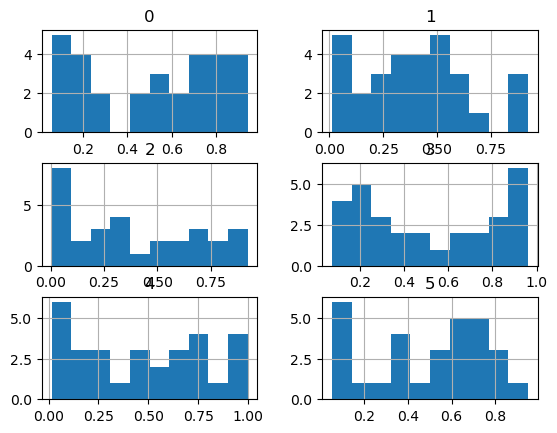

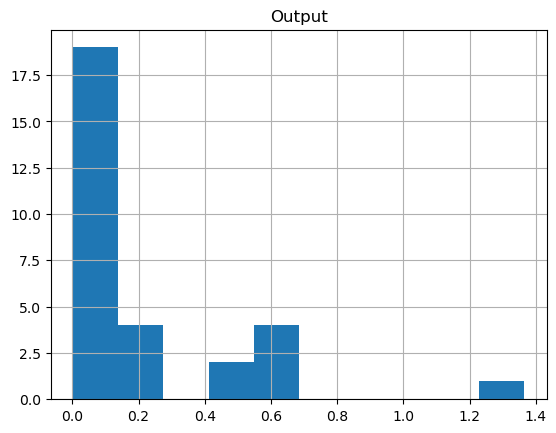

In [3]:
pd_inp.hist(), pd_out.hist()

- Interesting result above, I will check the matching inputs of this datapoint 
- [0.65011406, 0.68152635] these are the mathcing inputs that give this datapoint

<Axes: >

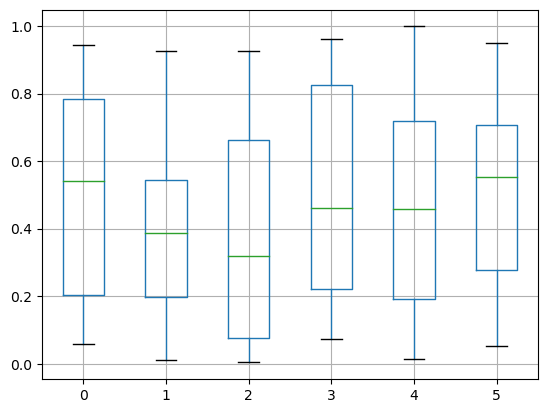

In [4]:
pd_inp.boxplot()

<Axes: >

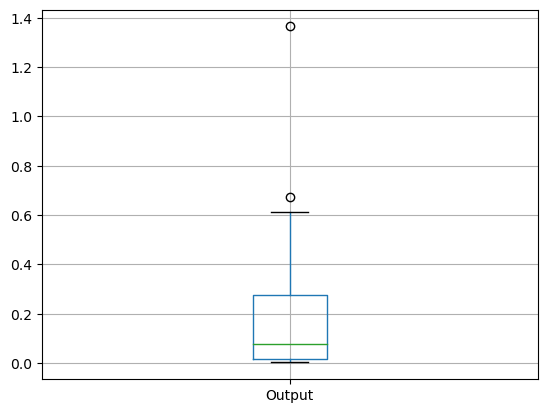

In [5]:
pd_out.boxplot()

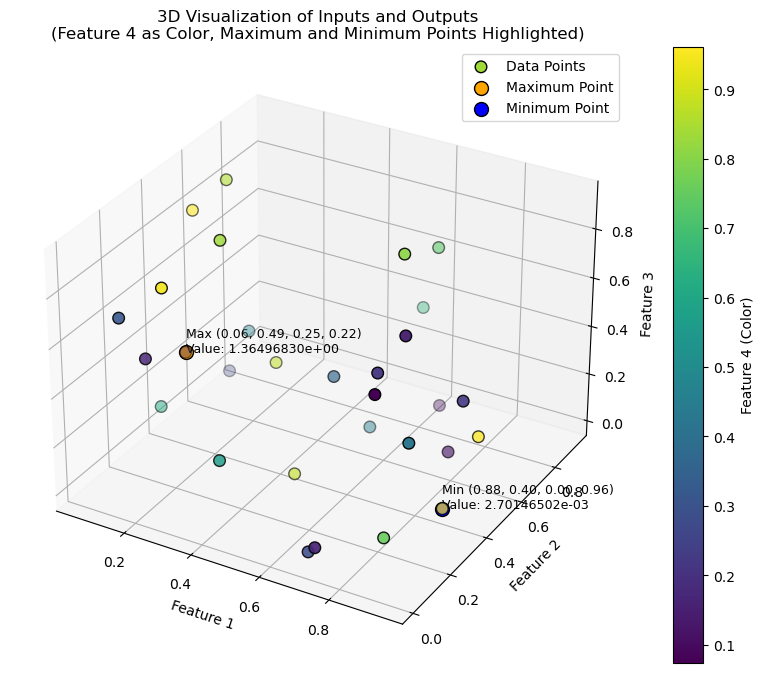

Maximum Value: 1.36496830e+00 at (x1=0.057896, x2=0.491672, x3=0.247422, x4=0.218118)
Minimum Value: 2.70146502e-03 at (x1=0.879871, x2=0.397962, x3=0.003635, x4=0.956991)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create grid
x = f1_inp[:, 0]  # Feature 1
y = f1_inp[:, 1]  # Feature 2
z = f1_inp[:, 2]  # Feature 3
c = f1_inp[:, 3]  # Feature 4 (visualized as color)
values = f1_out.ravel()  # Output values

# Find max and min points
max_idx = np.argmax(values)
max_coords = (x[max_idx], y[max_idx], z[max_idx], c[max_idx])
max_value = values[max_idx]

min_idx = np.argmin(values)
min_coords = (x[min_idx], y[min_idx], z[min_idx], c[min_idx])
min_value = values[min_idx]

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter points with color representing the 4th feature
scatter = ax.scatter(x, y, z, c=c, cmap='viridis', s=70, edgecolor='k', label="Data Points")
cbar = plt.colorbar(scatter, ax=ax, label="Feature 4 (Color)")

# Highlight max point
ax.scatter(max_coords[0], max_coords[1], max_coords[2], color='orange', edgecolor='black', s=100, label="Maximum Point")
ax.text(
    max_coords[0], max_coords[1], max_coords[2],
    f"Max ({max_coords[0]:.2f}, {max_coords[1]:.2f}, {max_coords[2]:.2f}, {max_coords[3]:.2f})\nValue: {max_value:.8e}",
    color='black', fontsize=9
)

# Highlight min point
ax.scatter(min_coords[0], min_coords[1], min_coords[2], color='blue', edgecolor='black', s=100, label="Minimum Point")
ax.text(
    min_coords[0], min_coords[1], min_coords[2],
    f"Min ({min_coords[0]:.2f}, {min_coords[1]:.2f}, {min_coords[2]:.2f}, {min_coords[3]:.2f})\nValue: {min_value:.8e}",
    color='black', fontsize=9
)

# Set plot labels
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("3D Visualization of Inputs and Outputs\n(Feature 4 as Color, Maximum and Minimum Points Highlighted)")
ax.legend()

plt.show()

# Print the maximum and minimum values and their coordinates
print(f"Maximum Value: {max_value:.8e} at (x1={max_coords[0]:.6f}, x2={max_coords[1]:.6f}, x3={max_coords[2]:.6f}, x4={max_coords[3]:.6f})")
print(f"Minimum Value: {min_value:.8e} at (x1={min_coords[0]:.6f}, x2={min_coords[1]:.6f}, x3={min_coords[2]:.6f}, x4={min_coords[3]:.6f})")


In [20]:
max_index_out = np.argmax(f1_out)
max_index_out
max_output = f1_out[max_index_out]

max_inp = f1_inp[max_index_out]

print(f"Best score found on index {max_index_out}")
max_inp,max_output


Best score found on index 27


(array([0.57776561, 0.42877174, 0.42582587, 0.24900741]), -4.025542281908162)

# ***************************** Output Transformation ******************************* 
- I will use Yeo-Johnson method to hanlde the heteroscedastic nature of the data, tranform outputs, and fic asymmetric skewness. 
- Reason I am using Yeo-Johnson is because we have positive and negative values as ouput 

#### I am strugling to scale the very small values into bigger so I can efficnetly apply Yeo-Johnson
##### UPDATE:
- I will multiply each number by its corresponding exponential part in order to preserve their relationship DOES NOT WORK, THE NUMBERS WONT SAVE THEIR RELATIONSHIP
- I also tried shifitng but it did not work due to the limitations of dealing with very small numbers. 

### Aim: Scale the data, so I can apply transformation like Yeo-Johnson, and imporve skewnes and variance of the output
##### The scaled data is not a great idea, as it will normalise it between 0, 1 meaning shrinking outliers, and loosing the original variance, so we would have two alternation of the variance, possibly going too far from the original nature of the data

-Scaling does not inherently "fix" skewness unless explicitly combined with a transformation designed for this purpose.
-If the scaling method involves transformations (e.g., log, square root, or power transforms), it can reduce or change skewness by making the data more symmetric.

In [12]:
from sklearn.preprocessing import PowerTransformer
import numpy as np

# Assuming f1_out is a NumPy array or pandas Series, and all values are positive
# Ensure all values are strictly positive, as required by Box-Cox
if np.any(f1_out <= 0):
    raise ValueError("Box-Cox transformation requires all input values to be strictly positive.")

# Apply the Box-Cox transformation
power_transformer = PowerTransformer(method='box-cox')
f1_out_transformed = power_transformer.fit_transform(f1_out.reshape(-1, 1))

# The transformed data is now stored in f1_out_transformed
f1_out, f1_out_transformed


(array([0.6044327 , 0.56275307, 0.00750324, 0.0614243 , 0.2730468 ,
        0.08374657, 1.3649683 , 0.09264495, 0.0178696 , 0.03356494,
        0.0735163 , 0.2063097 , 0.00882563, 0.26840032, 0.61152553,
        0.01479818, 0.27489251, 0.06676325, 0.04211835, 0.00270147,
        0.01820907, 0.00701603, 0.10050661, 0.47539552, 0.67514163,
        0.51645722, 0.00377748, 0.00313433, 0.02134252, 0.09541116]),
 array([[ 1.27756178],
        [ 1.23070594],
        [-1.22409575],
        [-0.11661231],
        [ 0.76878149],
        [ 0.06019425],
        [ 1.82783086],
        [ 0.11858179],
        [-0.78570802],
        [-0.45097572],
        [-0.01456214],
        [ 0.59566682],
        [-1.14400496],
        [ 0.75808667],
        [ 1.28523368],
        [-0.88315184],
        [ 0.77298267],
        [-0.06943241],
        [-0.32695452],
        [-1.70872505],
        [-0.77591725],
        [-1.25696865],
        [ 0.16596363],
        [ 1.12095885],
        [ 1.35055468],
        [ 1.174

In [ ]:
f1_out_transformed

# ************************** Input Transformation************************** 
- #### First I will use the Kumaraswammy Cumulative Distribution Function to addres:

- Non Stationary nature of the function, the way way the patter in the data changes over the unput space, example, rapidly grows in some regions and slower in some other regions 
- I will use the CDF and finds its best parameters by minimising NLML(Negative Log Marginal Likelyhood)

In [13]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C, WhiteKernel
from scipy.optimize import minimize

from sklearn.preprocessing import MinMaxScaler

# Normalize the input
scaler = MinMaxScaler()
f1_inp_normalized = scaler.fit_transform(f1_inp)
np.std(f1_inp_normalized), np.std(f1_inp)
skew(f1_inp_normalized), skew(f1_inp)
f1_inp_normalized

array([[0.24275281, 0.34252274, 0.97018066, 0.8556772 , 0.1414222 ,
        0.82759432],
       [0.54841912, 1.        , 0.36694506, 0.64554182, 0.7151455 ,
        0.32451188],
       [0.03723533, 0.71172091, 0.0676446 , 0.20839146, 0.96421524,
        0.65469089],
       [0.06892891, 0.66081128, 0.97963579, 0.88086337, 0.4052892 ,
        0.59354086],
       [0.64701676, 0.90513878, 0.73444683, 0.74179299, 0.52026742,
        0.3303975 ],
       [0.7992984 , 0.26736241, 0.65742863, 0.16275265, 0.31309881,
        0.04966451],
       [0.        , 0.52565378, 0.26471728, 0.16279704, 0.41219865,
        0.75548324],
       [0.15528293, 0.07384731, 0.59824562, 0.10920918, 0.        ,
        0.06215243],
       [0.66067937, 0.90379978, 0.01971704, 0.03136144, 0.67919031,
        0.71264199],
       [0.82758762, 0.20126627, 0.62109505, 0.        , 0.24814719,
        0.        ],
       [0.53202076, 0.48813754, 0.38706397, 0.32499435, 0.81522642,
        0.65159167],
       [0.75147328, 0

In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C, WhiteKernel

# Kumaraswamy warping function
def kumaraswamy_warp(x, a, b):
    x = np.clip(x, 1e-10, 1 - 1e-10)  # Avoid numerical issues
    return 1 - (1 - x**a)**b

# Normalize input data
def normalize_data(X):
    scaler = MinMaxScaler()
    return scaler.fit_transform(X)



In [17]:

# Apply CDF on the normalized input using the given parameters
f1_inp_warped = kumaraswamy_warp(f1_inp_normalized, a=0.1, b=0.2842809365)
f1_inp, f1_inp_warped


np.var(f1_inp),skew(f1_inp), np.var(f1_inp_warped),skew(f1_inp_warped)


(0.08689702651543421,
 array([-0.17746171,  0.24036152,  0.32740432,  0.12998613,  0.11317508,
        -0.28488317]),
 0.035785683807276286,
 array([-0.21383242,  0.1382485 ,  0.21354904,  0.08287197, -0.00452887,
        -0.25309835]))

In [16]:
from scipy.stats import skew
import numpy as np

# Define ranges for parameters a and b
a_values = np.linspace(0.1, 2.0, 300)  # 20 values between 0.1 and 2.0
b_values = np.linspace(0.1, 2.0,300)  # 20 values between 0.1 and 2.0

# Initialize variables to store the best results
best_a, best_b = None, None
best_variance = float("inf")
best_skewness = float("inf")
best_score = float("inf")

# Loop through all combinations of a and b
for a in a_values:
    for b in b_values:
        # Apply Kumaraswamy warping
        f1_inp_warped = kumaraswamy_warp(f1_inp_normalized, a=a, b=b)
        
        # Calculate variance and skewness
        variance = np.var(f1_inp_warped)
        skewness = np.mean(np.abs(skew(f1_inp_warped, axis=0)))  # Mean absolute skewness across features

        # Combine variance and skewness into a single score
        score = variance + skewness  # Adjust weight if needed

        # Update the best parameters if the score is improved
        if score < best_score:
            best_a, best_b = a, b
            best_variance = variance
            best_skewness = skewness
            best_score = score

# Print the best parameters and corresponding metrics
print(f"Best Parameters: a={best_a:.10f}, b={best_b:.10f}")
print(f"Reduced Variance: {best_variance:.6f}")
print(f"Reduced Skewness: {best_skewness:.6f}")


Best Parameters: a=0.1000000000, b=0.2842809365
Reduced Variance: 0.035786
Reduced Skewness: 0.151022



# ***************************** Gaussian Process****************************


In [25]:
from scipy.optimize import minimize
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C, WhiteKernel

# Define the UCB acquisition function
def upper_confidence_bound(X, gp, beta=2.0):
    """
    Calculate the Upper Confidence Bound (UCB) acquisition function.
    Args:
        X (ndarray): Input points for evaluation (7D).
        gp (GaussianProcessRegressor): Fitted GP model.
        beta (float): Exploration-exploitation trade-off parameter.
    Returns:
        UCB (ndarray): Upper confidence bound values at each input point.
    """
    mu, sigma = gp.predict(X, return_std=True)
    return mu + beta * sigma

# Optimize the UCB acquisition function
def optimize_acquisition_ucb(acquisition_func, gp, bounds, beta=2.0):
    """
    Optimize the UCB acquisition function to find the next best point.
    Args:
        acquisition_func (function): The acquisition function (UCB).
        gp (GaussianProcessRegressor): Fitted GP model.
        bounds (list): Bounds for the 7D input space.
        beta (float): Exploration-exploitation trade-off parameter.
    Returns:
        ndarray: The next best input point (7D).
    """
    def min_obj(X):
        return -acquisition_func(X.reshape(1, -1), gp, beta)

    # Ensure bounds and x0 match 7 dimensions
    x0 = np.random.uniform([b[0] for b in bounds], [b[1] for b in bounds])
    res = minimize(
        fun=min_obj,
        x0=x0,
        bounds=bounds,
        method="L-BFGS-B"
    )
    print("Optimization Result:", res)
    return res.x  # Returns 7D next point

# Define the Gaussian Process model
def fit_gp_model(f1_inp_warped, f1_out_transformed):
    """
    Fit a Gaussian Process model.
    Args:
        f1_inp_warped (ndarray): Input data (7D).
        f1_out_transformed (ndarray): Transformed output data.
    Returns:
        GaussianProcessRegressor: Fitted GP model.
    """
    kernel = (
        C(1.0, (1e-3, 1e3)) * Matern(length_scale=1.0, length_scale_bounds=(1e-2, 1e2), nu=1.5)
        + WhiteKernel(noise_level=1e-2, noise_level_bounds=(1e-10, 1.0))
    )
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)
    gp.fit(f1_inp_warped, f1_out_transformed)
    return gp

# Main Workflow
# -----------------------------------------------------------------

# 1. Ensure input data (7D)
# Assuming `f1_inp_warped` is a (N, 7) array, and `f1_out_transformed` is (N,) already declared

# 2. Fit the Gaussian Process model
gp = fit_gp_model(f1_inp_warped, f1_out_transformed)

# 3. Define bounds for 76 input space
bounds = [(0, 1) for _ in range(f1_inp_warped.shape[1])]  # Dynamically match input dimensions


# 4. Find the next best point using UCB
beta = 2.0
next_point = optimize_acquisition_ucb(upper_confidence_bound, gp, bounds, beta=beta)

# 5. Predict the next best point's output
next_z = gp.predict(next_point.reshape(1, -1))[0]

# 6. Debugging Log-Likelihood and Model Metrics
log_likelihood = gp.log_marginal_likelihood()
print(f"Log-Likelihood of the Model: {log_likelihood:.6f}")
print(f"Next Best Point (7D): {next_point}")
print(f"Predicted Output at Next Best Point: {next_z:.6f}")

# Additional Debugging: Key Metrics
max_idx = np.argmax(f1_out_transformed)
min_idx = np.argmin(f1_out_transformed)
max_coords = f1_inp_warped[max_idx]
min_coords = f1_inp_warped[min_idx]
max_value = f1_out_transformed[max_idx]
min_value = f1_out_transformed[min_idx]

print(f"Maximum Value: {max_value:.6f} at {max_coords}")
print(f"Minimum Value: {min_value:.6f} at {min_coords}")
# -----------------------------------------------------------------


Optimization Result:   message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -3.0473836399550853
        x: [ 5.912e-01  3.988e-01  6.377e-01  4.914e-01  2.437e-01
             7.533e-01]
      nit: 17
      jac: [ 5.773e-07  4.441e-07 -1.510e-06  9.770e-07 -2.309e-06
             8.882e-07]
     nfev: 168
     njev: 24
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
Log-Likelihood of the Model: -39.541658
Next Best Point (7D): [0.59124495 0.39877824 0.63771696 0.49141898 0.24372016 0.7533293 ]
Predicted Output at Next Best Point: 1.444723


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [24]:
# Calculate residuals
residuals = f1_out_transformed - gp.predict(f1_inp_warped)

# Print residual statistics
print(f"Mean Residual: {np.mean(residuals):.20f}")
print(f"Residual Standard Deviation: {np.std(residuals):.10f}")


Mean Residual: -0.00000000006567863882
Residual Standard Deviation: 1.4142135597


[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]